In [41]:
import os
from osgeo import gdal
import rasterio
from rasterio.mask import mask
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
raster_file_base = '/data/nca/ancillary/IUCN/GET/all-maps-raster-geotiff'
raster_file = '/data/nca/ancillary/IUCN/GET/all-maps-raster-geotiff/T2_2_Deciduous_temperate_forests.tif'
stats_file_base = '/data/nca/test/Bruno/WEED'

In [35]:
#Czech Republic
zonal_file = '/data/nca/weed/CU_testSites/priorityareasCZ_4326_singleShape.gpkg'
stats_summary_file =  os.path.join(stats_file_base,'priorityareasCZ_GET.csv')

In [232]:
#Norway
zonal_file = '/data/nca/weed/CU_testSites/priorityareasNO_4326.gpkg'
stats_summary_file =  os.path.join(stats_file_base,'priorityareasNO_GET.csv')

In [244]:
#Greece
zonal_file = '/data/nca/weed/CU_testSites/priorityareasEL_4326.gpkg'
stats_summary_file =  os.path.join(stats_file_base,'priorityareasEL_GET.csv')

In [43]:
#Colombia
#zonal_file = '/data/nca/weed/CU_testSites/priorityareasCO_4326.gpkg'
zonal_file = '/data/nca/weed/CU_testSites/final_test_areas_CO_4326.gpkg'
stats_summary_file =  os.path.join(stats_file_base,'priorityareasCO_GET.csv')

In [25]:
#South-Africa
zonal_file = '/data/nca/weed/CU_testSites/priorityareasSA_4326.gpkg'
stats_summary_file =  os.path.join(stats_file_base,'priorityareasSA_GET.csv')

In [3]:
#Vietnam
zonal_file = '/data/nca/weed/CU_testSites/priorityareasVN_4326.gpkg'
stats_summary_file =  os.path.join(stats_file_base,'priorityareasVN_GET.csv')

In [4]:
get_files = os.listdir(raster_file_base)
get_list=[]
for file in get_files:
    print(file)
    e = 4
    if not file.endswith('.tif'): continue
    if (file.startswith('FM')) or (file.startwith('MT')) or (file.startswith('SF')) or (file.startswith('SM')) or (file.startswith('TF')): e = 5
    if file.strtswith('MTF'): e = 6
    get_list.append(file[0:e])
        
#get_list = [x[0:4] for x in get_files if x.endswith('tif')]

F1_1_Perm_upland_streams.tif


AttributeError: 'str' object has no attribute 'startwith'

In [44]:
get_files = os.listdir(raster_file_base)
get_list = [x[0:6] for x in get_files if x.endswith('tif')]

In [45]:
file.startswith('FM') or file.startswith('MT')

False

In [51]:
df_zonal = gpd.read_file(zonal_file)
df_zonal

,K_ID,Project,Name,Year,Land_Cover,Geomorphol,Soils,Remote_Sen,Field_Data,Climate,Hydrology,Biotic,AreaHa,AreaKm,Scale,WEED_site,geometry
0,1,PNUD-IAVH,Mojana,2013,X,X,X,"Aerial photography, DEM HR, others",X,X,X,0,1.126596e+06,11265.962509,1::10.000,CO1,"MULTIPOLYGON (((-74.738 9.4473, -74.736 9.4437..."
1,2,Seaflower Expedition,San Andrés,2007-2023,X,X,X,"Aerial photography, DEM HR, others",X,X,0,X,2.650256e+03,26.502563,1::5.000,CO2,"MULTIPOLYGON (((-81.702 12.593, -81.702 12.593..."
2,3,Seaflower Expedition,Providencia,2007-2023,X,X,X,"Aerial photography, DEM HR, others",X,X,0,X,2.152690e+03,21.526901,1::5.000,CO3,"MULTIPOLYGON (((-81.365 13.386, -81.364 13.385..."
3,4,Monitoreo Manglares Invemar,Cienaga Grande de Santa Marta,2023,X,?,?,?,?,?,?,?,3.875097e+04,387.509717,1::25.000,CO4,"MULTIPOLYGON (((-74.663 10.92, -74.663 10.92, ..."
4,5,Monitoreo Manglares Invemar,Delta Sinú,2023,X,?,?,?,?,?,?,?,8.690905e+03,86.909051,1::25.000,CO5,"MULTIPOLYGON (((-75.981 9.3667, -75.981 9.3664..."
5,8,Delimitación de páramos,Pisba,2022,X,X,0,Sentinel,X,X,0,0,1.077495e+05,1077.494920,1::25.000,CO6,"MULTIPOLYGON (((-72.579 6.1627, -72.579 6.1627..."
6,9,Delimitación de páramos,Santurbán,2017,0,X,0,Sentinel,0,X,0,0,1.386377e+05,1386.376952,1::25.000,CO7,"MULTIPOLYGON (((-72.574 7.4121, -72.574 7.412,..."
7,10,Delimitación de páramos,Chingaza,2023,X,0,0,0,0,0,0,0,2.077601e+04,207.760117,1::25.000,CO8,"MULTIPOLYGON (((-73.669 4.6498, -73.669 4.6494..."
8,16,Grantierra-Consga,Putumayo,2017,X,0,0,Rapideye,0,0,0,0,4.926425e+05,4926.424990,1::25.000,CO9,"MULTIPOLYGON (((-76.372 1.115, -76.372 1.1147,..."
9,12,ANH,AP_Drummont/Becerril-Cesar,2020,X,0,0,Planetscope,?,0,0,0,2.827355e+05,2827.355077,1::10.000,CO10,"MULTIPOLYGON (((-73.523 9.9259, -73.516 9.924,..."


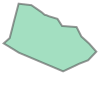

In [39]:
row.geometry

In [48]:
def zonal_statistics(row, raster_file):
    Vector = df_zonal[df_zonal.Name ==row.Name]
    with rasterio.open(raster_file) as src:
        #Vector=Vector.to_csr(src.crs)
        out_image, out_transform=mask(src,Vector.geometry, crop=True)
        values = np.unique(out_image[0])

    result = dict()
    for value in values:
        #if value == 0 : continue
        #print(str(value) + ' = ', end="")
        #print(np.count_nonzero(out_image == value))
        result[value] = (np.count_nonzero(out_image[0] == value))

    return result

In [31]:
#plt.imshow(out_image[0])

In [52]:
df2 = pd.DataFrame(columns=get_list)
for row in df_zonal.itertuples():
    print('processing ' + row.Name)
    df = pd.DataFrame(columns=range(0,2+1))  #none, most likely, less likely
    #Vector = df_zonal[df_zonal.NAZEV ==row.NAZEV]
    for file in get_files:
        if not file.endswith('.tif'): continue
        get_type = file[0:6]
        raster_file = os.path.join(raster_file_base, file)
        #result = zonal_statistics(df_zonal, getattr(row, 'Index'), raster_file)
        result = zonal_statistics(row, raster_file)
        df.loc[get_type] = result
    #print(df)
    stats_file = os.path.join(stats_file_base,row.WEED_site+'.csv')
    df.to_csv(stats_file)
    #keep only valid types per zone and put in summary table with 1 or 2 values per EFG
    if 0 in df.columns: df.drop(columns=0, inplace=True)
    df.dropna(axis=0, inplace=True, how = 'all')
    df3 = df
    s = df3.idxmax(axis=1)
    for idx, row2 in s.items():
        df2.loc[row.WEED_site,idx] = row2
df2.T.to_csv(stats_summary_file)

processing Mojana
processing San Andrés
processing Providencia
processing Cienaga Grande de Santa Marta
processing Delta Sinú
processing Pisba
processing Santurbán
processing Chingaza
processing Putumayo
processing AP_Drummont/Becerril-Cesar
processing AP_Plata/Simiti-Cesar
processing AP_Guane/Barrancabermeja
processing Piedemonte Casanare
processing Cuenca alta río Bogotá
processing Arco de deforestación Amazonia
processing Delta del Patía
processing Buenaventura


In [53]:
df2.T

,CO1,CO2,CO3,CO4,CO5,CO6,CO7,CO8,CO9,CO10,CO11,CO12,CO13,CO14,CO15,CO16,CO17
F1_1_P,2,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2
F1_2_P,1,NaN,NaN,2,1,2,NaN,NaN,NaN,2,1,1,NaN,2,2,NaN,NaN
F1_3_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_4_S,1,NaN,NaN,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1
F1_5_S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TF1_3_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TF1_4_,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,2,2,2,NaN,2,NaN,NaN
TF1_5_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TF1_6_,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN


In [75]:
df2.iloc[15].dropna().index

Index(['F1_1_P', 'F1_4_S', 'F3_2_C', 'F3_3_R', 'F3_4_F', 'F3_5_C', 'M1_5_M',
       'M1_6_S', 'M1_7_S', 'M1_8_S', 'M2_1_E', 'M4_2_M', 'MFT1_2', 'MT1_1_',
       'MT1_2_', 'MT2_1_', 'S1_2_E', 'S2_1_A', 'SM1_3_', 'T1_1_T', 'T7_3_P',
       'T7_4_U'],
      dtype='object')